## Tutorial: Template matching and HOG

==============================================================================================
## Descriptors extraction for object detection, based on template matching and HOG
==============================================================================================

In this tutorial we focus on the following main topics:

1) Template matching
   
2) Image Descriptors: "Sliding window" and HOG image descriptor    


# 1) Template matching

The match_template function from scikit-image uses fast, normalized cross-correlation [1] to find instances of the template in the image. Note that the peaks in the output of match_template correspond to the origin (i.e. top-left corner) of the template.

[1] J. P. Lewis, “Fast Normalized Cross-Correlation”, Industrial Light and Magic.


See an example in [coin exercise](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html#sphx-glr-auto-examples-features-detection-plot-template-py) in skimage.
 
Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

First exercise will claim to recognize a letter among letters of different fonts. For this purpose, let us read the image lettersA.gif

In [1]:
%matplotlib inline

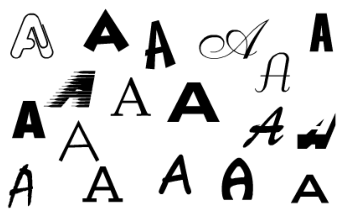

The dimensions of the image are:  (250, 400)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import match_template

from skimage import io
from skimage.color import rgb2gray, rgba2rgb

# Load image
image = io.imread('./images/lettersA.gif')

plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()

print('The dimensions of the image are: ', image.shape)

Let's read an image "A.png" that will be the query image that is the template to look among the different letters above.

The dimensions of the image are:  (58, 60, 4)


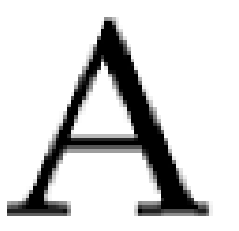

The dimensions of the image are:  (58, 60)


In [3]:
# Load template
imgA = io.imread('./images/A.png')
print('The dimensions of the image are: ', imgA.shape)

imgA = rgb2gray(rgba2rgb(imgA)) 


#visualize
plt.imshow(imgA, cmap='gray')
plt.axis('off')
plt.show()

print('The dimensions of the image are: ', imgA.shape)

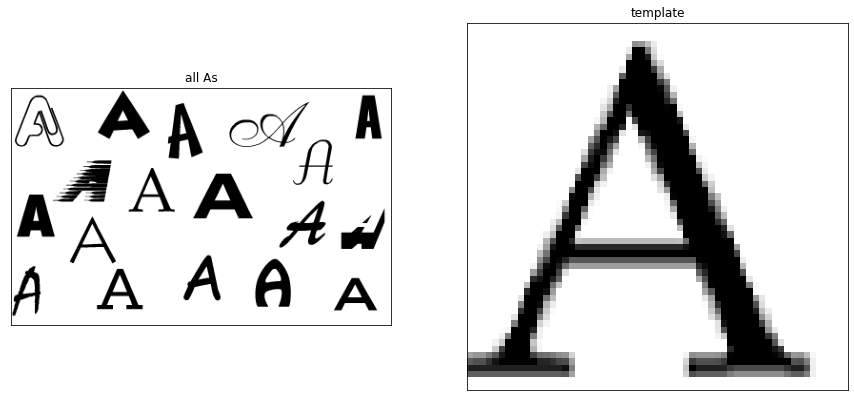

In [4]:
#visualize
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')


visualize2(image, imgA, 'all As', 'template')

The command [match_template()](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html) allows to match template using normalized cross-correlation. Check what is the output of it.

-0.2794111064396448 0.753508145338724
[-0.27941111 -0.27923872 -0.27892727 ...  0.73384647  0.74748882
  0.75350815]


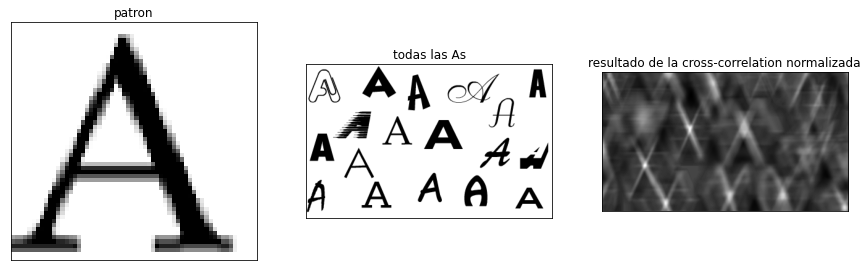

In [5]:

result = match_template(image, imgA) # Uses normalized cross-correlation

print(result.min(), result.max()) #why are we interested in the min and max?
print(np.unique(result))

visualize3(imgA, image, result, 'patron', 'todas las As', 'resultado de la cross-correlation normalizada')
plt.imshow(result, cmap='gray')
plt.show()


 Let's take the position in the image of the maximum response:

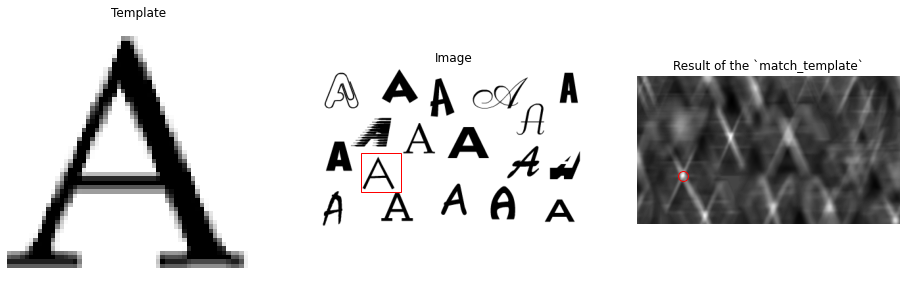

In [6]:

def tm_results(result,imgTemp, image): 
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]

    #visualize it
    fig = plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)

    ax1.imshow(imgTemp, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Template')

    ax2.imshow(image, cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('Image')
    # highlight matched region
    himg, wimg = imgA.shape
    rect = plt.Rectangle((x, y), wimg, himg, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    ax3.imshow(result, cmap='gray')
    ax3.set_axis_off()
    ax3.set_title('Result of the `match_template`')
    # highlight matched region
    ax3.autoscale(False)
    ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

    plt.show()


tm_results(result, imgA, image)

**Exercise:** Interpret the image of the right, result of match_template function.

**Exercise:** Add the second and third occurance of A.

Let's define a composed visualization function

**Exercise:** Think about the previous results and write your conclusions. 

Now, let's see what happen if we consider the same image but rotated.

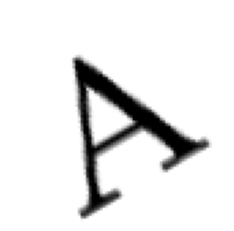

(80, 81)


In [7]:
from skimage.transform import rotate

imgA_rot=rotate(imgA, 30, resize=True, cval=1)

#visualize it
plt.imshow(imgA_rot, cmap='gray')
plt.axis('off')

plt.show()

print(imgA_rot.shape)

In [8]:

result = match_template(image, imgA_rot) # Uses normalized cross-correlation

print(result.min(), result.max())
print(np.unique(result))


-0.21732516497106313 0.39022077835267327
[-0.21732516 -0.21676562 -0.21665813 ...  0.38943573  0.39003537
  0.39022078]


Check how the correlation value changed!

In [ ]:
tm_results(result, imgA_rot, image)

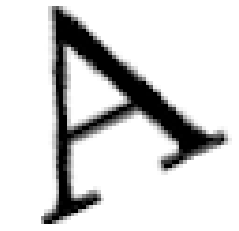

(58, 60)


In [9]:
imgA_rot = rgb2gray(rgba2rgb(io.imread('./images/A_rotated2.png'))) 

plt.imshow(imgA_rot, cmap='gray')
plt.axis('off')

plt.show()

print(imgA_rot.shape)

In [10]:

result = match_template(image, imgA_rot) # Uses normalized cross-correlation

print(result.min(), result.max())
print(np.unique(result))


-0.2530970812511288 0.40454433168422904
[-0.25309708 -0.25255769 -0.25235161 ...  0.4023256   0.40271085
  0.40454433]


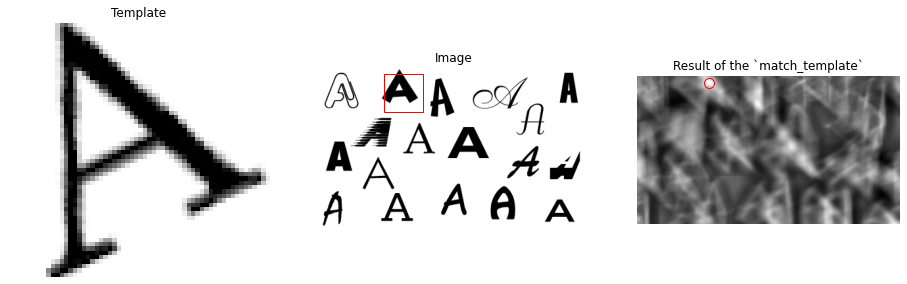

In [11]:
tm_results(result, imgA_rot, image)


**Exercise:** Think about the previous results and write your conclusions. 

Use a new letter as a template:

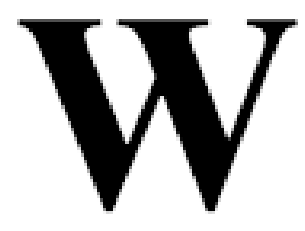

(58, 60)


In [12]:
# Load template
imgW = rgb2gray(rgba2rgb(io.imread('./images/W.png'))) 

#visualize it
plt.imshow(imgW, cmap='gray')
plt.axis('off')

plt.show()

print(imgA.shape)

In [13]:

result = match_template(image, imgW) # Uses normalized cross-correlation

print(result.min(), result.max())
print(np.unique(result))


-0.3097735799959299 0.4411262392488106
[-0.30977358 -0.30951397 -0.30913744 ...  0.43641625  0.44038007
  0.44112624]


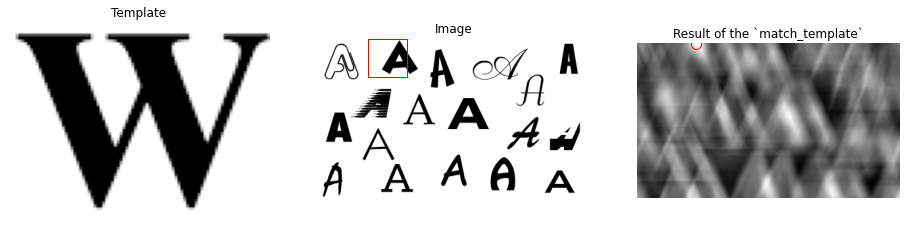

In [14]:
tm_results(result, imgW, image)

**Exercise:** Think about the previous results. What are your conclusions now?

Let's now use another image.

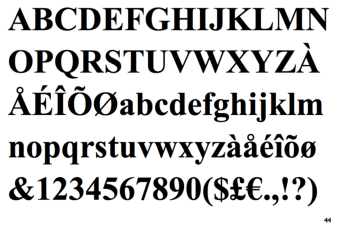

(576, 864, 4)


In [15]:
# Load a new image
image = io.imread('./images/text.gif')

plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()

print(image.shape)

In [16]:
from skimage.color import rgba2rgb

image = rgb2gray(rgba2rgb(image))
print(image.shape)

(576, 864)


-0.35547944039597534 0.7124451359815435
[-0.35547944 -0.3553248  -0.35468175 ...  0.7124054   0.7124054
  0.71244514]


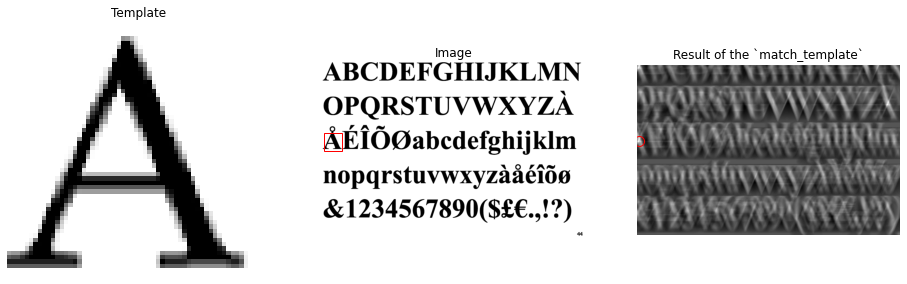

In [17]:

result = match_template(image, imgA) # Uses normalized cross-correlation

print(result.min(), result.max())
print(np.unique(result))


tm_results(result, imgA, image)



Let's see what happen with a new contrast.

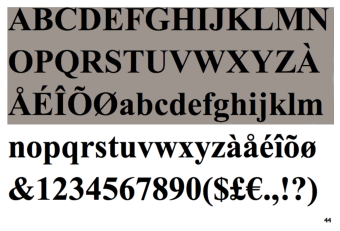

(576, 864)


In [18]:

# Load a new image
image = io.imread('./images/text2.gif')

plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()

image = rgb2gray(rgba2rgb(image))
print(image.shape)

-0.3475282592036723 0.7112462793319315
[-0.34752826 -0.34718705 -0.3466038  ...  0.71121475  0.71124628
  0.71124628]


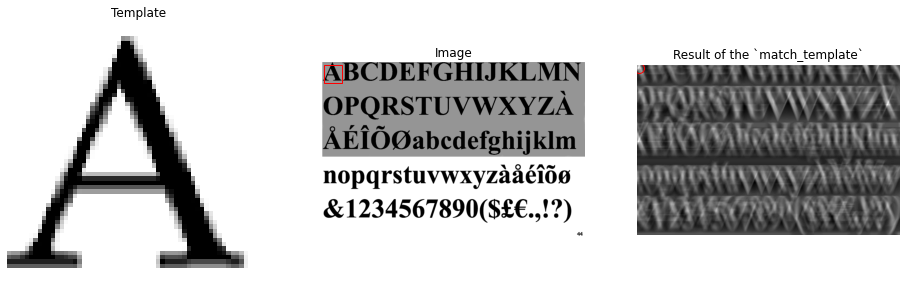

In [19]:

result = match_template(image, imgA) # Uses normalized cross-correlation

print(result.min(), result.max())
print(np.unique(result))


tm_results(result, imgA, image)



Change the contrast of imgA

-0.3475282592036723 0.7112462793319315
[-0.34752826 -0.34718705 -0.3466038  ...  0.71121475  0.71124628
  0.71124628]


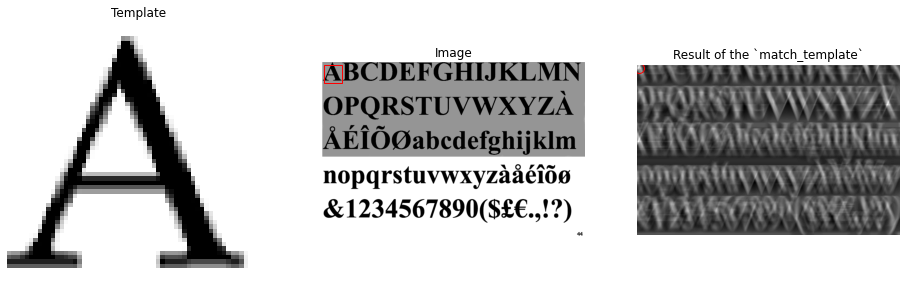

In [20]:

result = match_template(image, imgA/2) # Uses normalized cross-correlation

print(result.min(), result.max())
print(np.unique(result))


tm_results(result, imgA/2, image)



**Exercise:** Think about the previous results and write your conclusions. 

**Exercise:** Change the size of imgA

-0.6669623736132677 0.6502513572564913
[-0.66696237 -0.66696237 -0.66696237 ...  0.62730268  0.65013046
  0.65025136]


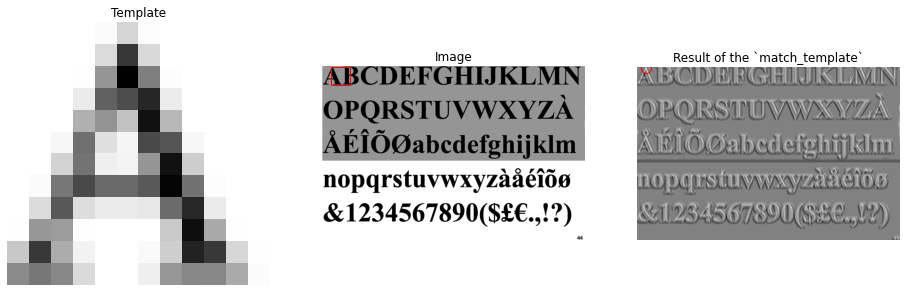

In [21]:
from skimage.transform import rescale

imgA2=rescale(imgA,.2)
result = match_template(image, imgA2) # Uses normalized cross-correlation

print(result.min(), result.max())
print(np.unique(result))


tm_results(result, imgA2, image)

# 2) Histogram of Oriented Gradients


The [Histogram of Oriented Gradients (HOG)](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) feature descriptor is classical image descriptor for object detection.

Check:
- a) what is it about, and
- b) how to construct it.

Given the image 'car_template.png' and the folder 'cars', apply the HOG descriptor in order to detect where there is a car in the images in the folder 'car'. To this purpose, apply the "sliding window" technique.

Read the car template ('car_template.png'), obtain its HOG descriptor and visualize it. [Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 

The HOG detector function is in the skimage.feature library. 

In [ ]:
from skimage.feature import hog

fd_A, hog_A = hog(imgA, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

visualize2(imgA, hog_A, 'Input image', 'Histogram of Oriented Gradients')


In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure
from skimage import transform

#Reading, computing and visualizing the car example

car=io.imread('./images/car_template.png')

print(car.shape)

fd_car, hog_car = hog(car, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)


visualize2(car, hog_car, 'Input image', 'Histogram of Oriented Gradients')

In [ ]:
print(len(fd_car))

Now, let's apply the HOG descriptor on the complete set of images.
We read images from the folder "car", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the car template. In order to accelerate the algorithm execution, we can apply a sliding window with a step of X pixels both vertically and horizontally (e.g. X=5).

Finally, we visualize the location in the image that is the most similar to the car template. Visualize the results in the following format:


<img src="images/car-hog.png" width="800" height="100">


What distance will you use to compare both HOG descriptors of the car template and the image region? Compare if there is any difference in their results.


In [ ]:
# Complete the code below:

import numpy as np

def visualize_cars(car,im,im_result,pos_x,pos_y,wcar, hcar):
        fig=plt.figure(figsize=(18,3))
        ax1=plt.subplot(1,3,1)
        ax2=plt.subplot(1,3,2)
        ax3=plt.subplot(1,3,3, sharex=ax2, sharey=ax2)
        ax1.axis('off')
        ax1.set_title('car template')
        ax1.imshow(car, cmap='gray')
        ax2.set_title('best region match')
        ax2.axis('off')
        ax2.imshow(im, cmap='gray')
        ax3.set_title('HOG distances')
        ax3.axis('off')
        ax3.imshow(im_result, cmap='gray')
        rect2 = plt.Rectangle((pos_x-wcar/2, pos_y-hcar/2), wcar, hcar, edgecolor='r', facecolor='none')
        rect3 = plt.Rectangle((pos_x-wcar/2, pos_y-hcar/2), wcar, hcar, edgecolor='r', facecolor='none')
        ax2.add_patch(rect2)
        ax3.add_patch(rect3)

        plt.show()
        

In [ ]:
#Computing the similarity between the car template and all the regions of the same size of the different car examples in the folder cars/

def car_test():
  ....

car_test()

Let's compute HOG in other images to see other structures. 

In [ ]:

import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure
from skimage import transform

#Reading, computing and visualizing the car example

house=rgb2gray(io.imread('./images/house.png'))

fd_house, hog_house = hog(house, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)


visualize2(house, hog_house, 'Input image', 'Histogram of Oriented Gradients')


In [ ]:

import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure
from skimage import transform

#Reading, computing and visualizing the car example

house=rgb2gray(io.imread('./images/house2.png'))

fd_house, hog_house = hog(house, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)


visualize2(house, hog_house, 'Input image', 'Histogram of Oriented Gradients')


**Exercises:** Compare Template Matching and HOG on the same image.